In [2]:
import gzip
import json
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from Load import json_to_df
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Music

## Data:

In [4]:
df_music = pd.read_csv("data\\music_reviews(subset).csv")

## Preproccesing
- using both the review and summary
- making the targets (0,1)
- dropping empty rows

## Train set

In [5]:
df_music = df_music.replace(np.nan, '', regex=True)
df_music['review_headline'] = df_music.review_body + ' ' + df_music.review_headline
data = df_music[["review_headline","sentiment"]]
data = data.replace({"sentiment":{"positive":1,"negative":0}})

## Validation set

In [6]:
df_music_dev = pd.read_csv("data\\music_reviews_dev(subset).csv")

df_music_dev = df_music_dev.replace(np.nan, '', regex=True)
df_music_dev['review_headline'] = df_music_dev.review_body + ' ' + df_music_dev.review_headline
data_dev = df_music_dev[["review_headline","sentiment"]]
data_dev = data_dev.replace({"sentiment":{"positive":1,"negative":0}})

## Pipeline
- words counts
- naive bayes

In [7]:
pipeline = Pipeline(steps=[
    ("TFIDFVectorizer_transform",TfidfVectorizer()),
    ("MultinomialNB", MultinomialNB())
])

In [8]:
pipeline.fit(data["review_headline"],data["sentiment"])

Pipeline(steps=[('TFIDFVectorizer_transform', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

## Validation
Using f1 score to validate

In [9]:
preds = pipeline.predict(data_dev["review_headline"])

In [10]:
f1_score(preds, data_dev["sentiment"])

0.8679435130044109

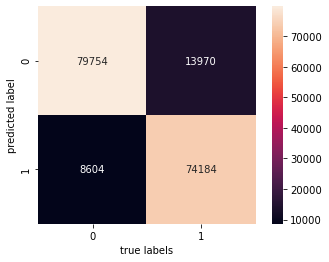

In [11]:
mat = confusion_matrix(data_dev["sentiment"], preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

### Testing the old model on the new data

In [13]:
with open("models\\baseline_model.pickle", "rb") as file:
    model_music_org = pickle.load(file)

In [14]:
preds = model_music_org.predict(data_dev["review_headline"])

In [15]:
f1_score(preds, data_dev["sentiment"])

0.8648085820097482

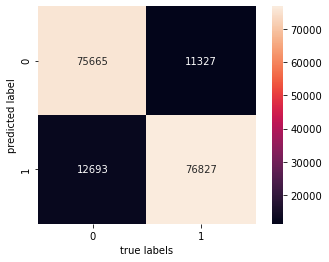

In [16]:
mat = confusion_matrix(data_dev["sentiment"], preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

## Write new model to file

In [12]:
with open("baseline_model_music.pickle", "wb") as file:
    pickle.dump(pipeline, file)

# Beauty
## Data:

In [3]:
df_beauty = pd.read_csv("data\\beauty_reviews(subset).csv")
df_beauty

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,0,US,25245446,R1VTEU1P0T413X,B004NHVTZQ,417544650,Royale E038 Classic 1.5 Inch Black Flat Iron,Beauty,4,0,0,N,N,Great flat iron.,Great flat iron unfortunately I bought this at...,2014-12-10,positive
1,1,US,41673718,R1FQJ6NOXV3ESI,B00GBYNAJM,382525561,Sexy Red Lingerie Sequin Heart Tassel Breast B...,Beauty,5,0,0,N,Y,Super cute! I received a different pair that h...,Super cute! I received a different pair that h...,2015-04-08,positive
2,2,US,41448631,RPHARNZ4IXL8D,B006GU1B5Q,283496396,Iso Beauty Ceramic Pro Flat Iron Straightener ...,Beauty,5,2,2,N,Y,Great product,Good quality straightener. It gets super hot a...,2013-11-09,positive
3,3,US,45153186,R1NMN4RANL21D2,B00J6SW13Q,332394087,SEPHORA COLLECTION Together in Pink Brush Set ...,Beauty,1,0,2,N,Y,One Star,"Actually，I have got a book,wasn't this Pink Br...",2014-12-14,negative
4,4,US,44124985,RRSUKHUHPKVS9,B000ELYIVM,413825976,Dental Hygiene Preferred Complete Day/Night M...,Beauty,5,0,1,N,Y,Good cheap mouthguard(s),These are good and durable. Comes with 2 to ge...,2010-12-30,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081376,1081376,US,15443038,R2TQLKQ5TYSBRX,B00158O1EM,897391812,Norelco 7735X Cool Skin Additive In/Out of Sho...,Beauty,5,3,3,N,N,Cool Face Saver,I was hesitant that this would work well. As a...,2009-01-25,positive
1081377,1081377,US,20640811,RETGMD5GBUJ6W,B0028RBNYK,107073507,Century Shampoo Scalp Massage Brush #100 * Blu...,Beauty,5,0,0,N,Y,Great product!,"These are fantastic. They work well, feel real...",2011-06-15,positive
1081378,1081378,US,18061495,R34N7UHVVTUBKO,B002FGKPWK,272867906,The Body Shop Exfoliating Skin Towel,Beauty,2,1,1,N,Y,Doesn't last long,Started coming apart at the seams after a coup...,2014-02-12,negative
1081379,1081379,US,8616203,R1ZTY1W7AMNBP8,B003983I1S,555191963,Gillette Fusion5 ProGlide Men's Razor Blades R...,Beauty,5,0,0,N,N,Closest Shave,I recently was able to try out the new ProGlid...,2013-06-28,positive


## Preproccesing
- using both the review and summary
- making the targets (0,1)
- dropping empty rows

## Train set

In [4]:
df_beauty = df_beauty.replace(np.nan, '', regex=True)
df_beauty['review_headline'] = df_beauty.review_body + ' ' + df_beauty.review_headline
data = df_beauty[["review_headline","sentiment"]]
data = data.replace({"sentiment":{"positive":1,"negative":0}})

## Validation set

In [6]:
df_beauty_dev = pd.read_csv("data\\beauty_reviews_dev(subset).csv")

df_beauty_dev = df_beauty_dev.replace(np.nan, '', regex=True)
df_beauty_dev['review_headline'] = df_beauty_dev.review_body + ' ' + df_beauty_dev.review_headline
data_dev = df_beauty_dev[["review_headline","sentiment"]]
data_dev = data_dev.replace({"sentiment":{"positive":1,"negative":0}})

## Pipeline
- words counts
- naive bayes

In [7]:
pipeline = Pipeline(steps=[
    ("TFIDFVectorizer_transform",TfidfVectorizer()),
    ("MultinomialNB", MultinomialNB())
])

In [8]:
pipeline.fit(data["review_headline"],data["sentiment"])

Pipeline(steps=[('TFIDFVectorizer_transform', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

## Validation
Using f1 score to validate

In [9]:
preds = pipeline.predict(data_dev["review_headline"])

In [10]:
f1_score(preds, data_dev["sentiment"])

0.9078595917998173

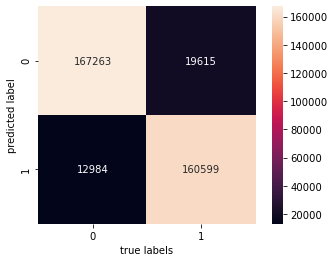

In [11]:
mat = confusion_matrix(data_dev["sentiment"], preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

## Write model to file

In [18]:
with open("baseline_model_beauty.pickle", "wb") as file:
    pickle.dump(pipeline, file)

# Sports
## Data:

In [19]:
df_sports = pd.read_csv("data\\sports_reviews(subset).csv")
df_sports

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,0,US,50252441,R6TAXL600Q7HM,B003BYKJH6,477541264,Organized Fishing Regular Sized Rubber Replace...,Sports,2,0,0,N,Y,Two Stars,Rubber is too soft and will not hold rods secu...,2014-10-12,negative
1,1,US,33797792,R2I8433XLIGLC4,B0055DNHLQ,265512225,MLB Boston Red Sox Carl Crawford Signature Ser...,Sports,1,1,1,N,N,they should've showed me the back,I assumed the back just had a number or was pl...,2014-06-19,negative
2,2,US,948790,RXAODS7YI7F5F,B00MG1VQ4A,30042226,Nike Men's Mercurial Victory IV FG Soccer Shoe,Sports,5,0,0,N,Y,Five Stars,Amazing,2015-06-07,positive
3,3,US,13064212,R22UO05PUKW6R6,B001AGP3FK,490903426,"Men's Nike Feather Light Cap, Black",Sports,2,2,3,N,Y,fit too large for average male,the hat is humongous unless you got watermelon...,2014-05-05,negative
4,4,US,28760389,R3KBFYWQ1KJ7A4,B00162PWI6,234218806,Lee Precision 308 Win Loader,Sports,5,1,1,N,Y,Love the classics,"If you know Lee products, and you just want to...",2014-04-26,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888547,888547,US,49397927,R10ZA0US8S23ZH,B00RPZJ7HU,886866209,SNIPER® Rear Sight with Elevation Adjustable P...,Sports,5,0,0,N,Y,Nice,Good quality piece. Fit my gun good and the si...,2015-08-14,positive
888548,888548,US,29803250,R9MZ4RTFXJR9V,B001RMUOKG,567842073,Barnett Outdoors Junior Archery 28-Inch Arrows...,Sports,1,0,0,N,Y,Terrible,"Really bad, even for cheap youth bows.",2015-06-09,negative
888549,888549,US,48027112,R8M5RI5Z2HFBS,B00030A4AS,58599184,Mustad 3366 Classic Sproat Large Ring Hook (10...,Sports,1,0,5,N,Y,small.,small. too small,2015-02-08,negative
888550,888550,US,26343792,RQZ0KYJFR13UD,B001O0D6QA,104661074,Attwood 9065-1 Battery Box Standard,Sports,5,0,0,N,Y,Its a box,Ordered this battery box because the previous ...,2012-12-11,positive


## Preproccesing
- using both the review and summary
- making the targets (0,1)
- dropping empty rows

## Train set

In [20]:
df_sports = df_sports.replace(np.nan, '', regex=True)
df_sports['review_headline'] = df_sports.review_body + ' ' + df_sports.review_headline
data = df_sports[["review_headline","sentiment"]]
data = data.replace({"sentiment":{"positive":1,"negative":0}})

## Validation set

In [21]:
df_sports_dev = pd.read_csv("data\\sports_reviews_dev(subset).csv")

df_sports_dev = df_sports_dev.replace(np.nan, '', regex=True)
df_sports_dev['review_headline'] = df_sports_dev.review_body + ' ' + df_sports_dev.review_headline
data_dev = df_sports_dev[["review_headline","sentiment"]]
data_dev = data_dev.replace({"sentiment":{"positive":1,"negative":0}})

## Pipeline
- words counts
- naive bayes

In [22]:
pipeline = Pipeline(steps=[
    ("TFIDFVectorizer_transform",TfidfVectorizer()),
    ("MultinomialNB", MultinomialNB())
])

In [23]:
pipeline.fit(data["review_headline"],data["sentiment"])

Pipeline(steps=[('TFIDFVectorizer_transform', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

## Validation
Using f1 score to validate

In [24]:
preds = pipeline.predict(data_dev["review_headline"])

In [25]:
f1_score(preds, data_dev["sentiment"])

0.9054829852733173

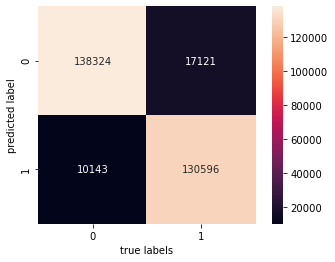

In [26]:
mat = confusion_matrix(data_dev["sentiment"], preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

## Write model to file

In [27]:
with open("baseline_model_sports.pickle", "wb") as file:
    pickle.dump(pipeline, file)